In [28]:
"""
STSCI 4060 - Final Project
Yunxi Kou - yk799

Step 8. Plot a 3-D K-Means clustering for data from SQL database
"""

import cx_Oracle
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans

In [29]:
con = cx_Oracle.connect("python/py39fp")
cur = con.cursor()

data = cur.execute('''
                    SELECT freq_A, freq_T, freq_GC
                    FROM BeeGenes
                    ''')

resultList = []
for line in data:
    resultList.append(line)
    
#print(resultList)

cur.close()
con.close()

# Create numpy Array from queried data
dataset = np.array(resultList)

Text(0.5, 0.92, 'K-Means')

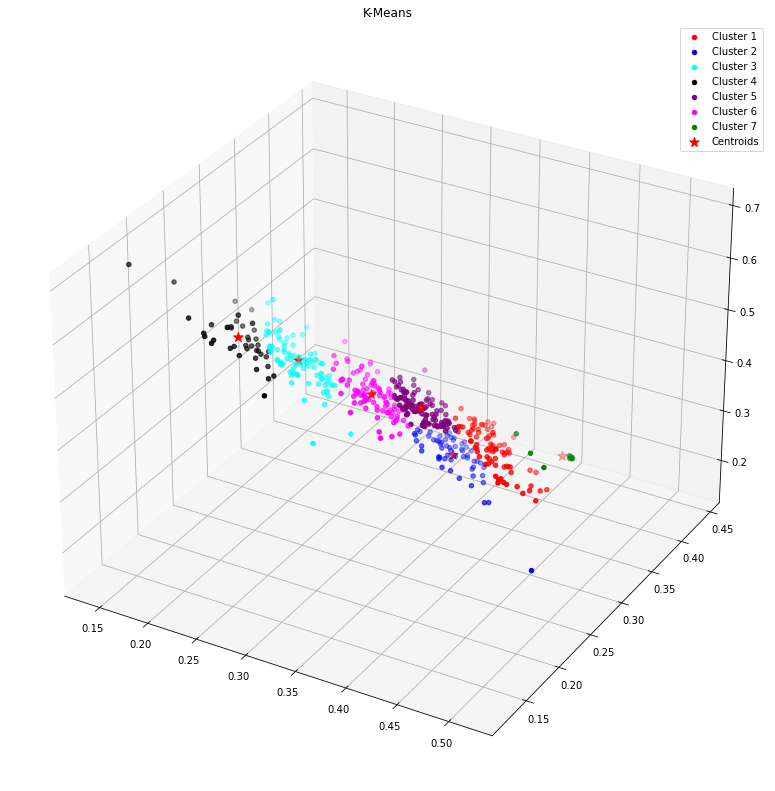

In [30]:
# K-Means clustering
km = KMeans(n_clusters = 7, init = 'random', n_init = 10, max_iter = 500, tol = 1e-4, random_state = 0)
cluster_km = km.fit_predict(dataset)


# Create Axes3D scatter plot
fig = plt.figure(figsize = (14,14))
ax = fig.add_subplot(111, projection = '3d')

# ScatterPlot data
ax.scatter(dataset[cluster_km == 0, 0], dataset[cluster_km == 0, 1], dataset[cluster_km == 0, 2],
          s = 20, c = 'red', marker = 'o', label = 'Cluster 1')
ax.scatter(dataset[cluster_km == 1, 0], dataset[cluster_km == 1, 1], dataset[cluster_km == 1, 2],
          s = 20, c = 'blue', marker = 'o', label = 'Cluster 2')
ax.scatter(dataset[cluster_km == 2, 0], dataset[cluster_km == 2, 1], dataset[cluster_km == 2, 2],
          s = 20, c = 'aqua', marker = 'o', label = 'Cluster 3')
ax.scatter(dataset[cluster_km == 3, 0], dataset[cluster_km == 3, 1], dataset[cluster_km == 3, 2],
          s = 20, c = 'black', marker = 'o', label = 'Cluster 4')
ax.scatter(dataset[cluster_km == 4, 0], dataset[cluster_km == 4, 1], dataset[cluster_km == 4, 2],
          s = 20, c = 'purple', marker = 'o', label = 'Cluster 5')
ax.scatter(dataset[cluster_km == 5, 0], dataset[cluster_km == 5, 1], dataset[cluster_km == 5, 2],
          s = 20, c = 'magenta', marker = 'o', label = 'Cluster 6')
ax.scatter(dataset[cluster_km == 6, 0], dataset[cluster_km == 6, 1], dataset[cluster_km == 6, 2],
          s = 20, c = 'green', marker = 'o', label = 'Cluster 7')

# Mark centroids
ax.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], km.cluster_centers_[:, 2],
          s = 100, c = 'red', marker = '*', label = 'Centroids')

# Show plot with title and legend
ax.legend(loc = 1)
ax.set_title('K-Means')